In [1]:
import pandas as pd
import numpy as np

In [2]:
filepath = "titanic3.xls"

In [3]:
all_df = pd.read_excel(filepath)

In [4]:
all_df[:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
cols = ["survived","name","sex","age","sibsp","parch","fare","embarked","pclass"]

In [6]:
all_df = all_df[cols]

In [7]:
all_df[:5]

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,1
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,1
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,1
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,1


In [8]:
df = all_df.drop(["name"],axis = 1)

In [9]:
df.isnull()

,survived,sex,age,sibsp,parch,fare,embarked,pclass
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False
1305,False,False,True,False,False,False,False,False
1306,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False


In [10]:
df[:5]

,survived,sex,age,sibsp,parch,fare,embarked,pclass
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,0,female,2.0000,1,2,151.5500,S,1
3,0,male,30.0000,1,2,151.5500,S,1
4,0,female,25.0000,1,2,151.5500,S,1


In [11]:
df.isnull().sum()

survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
pclass        0
dtype: int64

In [12]:
age_mean = df["age"].mean()
df["age"] = df["age"].fillna(age_mean)

In [13]:
df[:10]

,survived,sex,age,sibsp,parch,fare,embarked,pclass
0,1,female,29.0000,0,0,211.3375,S,1
1,1,male,0.9167,1,2,151.5500,S,1
2,0,female,2.0000,1,2,151.5500,S,1
3,0,male,30.0000,1,2,151.5500,S,1
4,0,female,25.0000,1,2,151.5500,S,1
5,1,male,48.0000,0,0,26.5500,S,1
6,1,female,63.0000,1,0,77.9583,S,1
7,0,male,39.0000,0,0,0.0000,S,1
8,1,female,53.0000,2,0,51.4792,S,1
9,0,male,71.0000,0,0,49.5042,C,1


In [14]:
fare_mean = df["fare"].mean()
df["fare"] = df["fare"].fillna(fare_mean)

In [15]:
df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
pclass      0
dtype: int64

In [16]:
df["sex"] = df["sex"].map({"female":0,"male":1}).astype(int)

In [17]:
df[:5]

,survived,sex,age,sibsp,parch,fare,embarked,pclass
0,1,0,29.0000,0,0,211.3375,S,1
1,1,1,0.9167,1,2,151.5500,S,1
2,0,0,2.0000,1,2,151.5500,S,1
3,0,1,30.0000,1,2,151.5500,S,1
4,0,0,25.0000,1,2,151.5500,S,1


In [18]:
x_OH_df = pd.get_dummies(data = df, columns = ["embarked"])

In [19]:
x_OH_df[:5]

,survived,sex,age,sibsp,parch,fare,pclass,embarked_C,embarked_Q,embarked_S
0,1,0,29.0000,0,0,211.3375,1,0,0,1
1,1,1,0.9167,1,2,151.5500,1,0,0,1
2,0,0,2.0000,1,2,151.5500,1,0,0,1
3,0,1,30.0000,1,2,151.5500,1,0,0,1
4,0,0,25.0000,1,2,151.5500,1,0,0,1


In [20]:
ndarray = x_OH_df.values

In [21]:
ndarray.shape

(1309, 10)

In [23]:
ndarray[:5]

array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
          1.    ,   0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ,
          1.    ,   0.    ,   0.    ,   1.    ],
       [  0.    ,   0.    ,   2.    ,   1.    ,   2.    , 151.55  ,
          1.    ,   0.    ,   0.    ,   1.    ],
       [  0.    ,   1.    ,  30.    ,   1.    ,   2.    , 151.55  ,
          1.    ,   0.    ,   0.    ,   1.    ],
       [  0.    ,   0.    ,  25.    ,   1.    ,   2.    , 151.55  ,
          1.    ,   0.    ,   0.    ,   1.    ]])

In [24]:
label = ndarray[:,0]
features = ndarray[:,1:]

In [25]:
label[:5]

array([1., 1., 0., 0., 0.])

In [26]:
features[:5]

array([[  0.    ,  29.    ,   0.    ,   0.    , 211.3375,   1.    ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   0.9167,   1.    ,   2.    , 151.55  ,   1.    ,
          0.    ,   0.    ,   1.    ],
       [  0.    ,   2.    ,   1.    ,   2.    , 151.55  ,   1.    ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,  30.    ,   1.    ,   2.    , 151.55  ,   1.    ,
          0.    ,   0.    ,   1.    ],
       [  0.    ,  25.    ,   1.    ,   2.    , 151.55  ,   1.    ,
          0.    ,   0.    ,   1.    ]])

In [27]:
from sklearn import preprocessing

In [28]:
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))

In [29]:
scaledFeatures = minmax_scale.fit_transform(features) 

In [30]:
scaledFeatures[:5]

array([[0.        , 0.36116884, 0.        , 0.        , 0.41250333,
        0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.00939458, 0.125     , 0.22222222, 0.2958059 ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.0229641 , 0.125     , 0.22222222, 0.2958059 ,
        0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.37369494, 0.125     , 0.22222222, 0.2958059 ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.31106443, 0.125     , 0.22222222, 0.2958059 ,
        0.        , 0.        , 0.        , 1.        ]])

In [31]:
def PreprocessingData(raw_df):
    df = raw_df.drop(["name"],axis = 1)
    age_mean = df["age"].mean()
    df["age"] = df["age"].fillna(age_mean)
    fare_mean = df["fare"].mean()
    df["fare"] = df["fare"].fillna(fare_mean)
    df["sex"] = df["sex"].map({"female":0,"male":1}).astype(int)
    x_OH_df = pd.get_dummies(data = df, columns = ["embarked"])
    
    ndarray = x_OH_df.values
    label = ndarray[:,0]
    features = ndarray[:,1:]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range = (0,1))
    scaledFeatures = minmax_scale.fit_transform(features) 
    
    return scaledFeatures, label

In [32]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [33]:
train_features, train_label = PreprocessingData(train_df)
test_features, test_label = PreprocessingData(test_df)

In [34]:
train_features[:5]

array([[0.        , 0.36116884, 0.        , 0.        , 0.41250333,
        0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.00939458, 0.125     , 0.22222222, 0.2958059 ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.0229641 , 0.125     , 0.22222222, 0.2958059 ,
        0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.37369494, 0.125     , 0.22222222, 0.2958059 ,
        0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.59916476, 0.        , 0.        , 0.05182215,
        0.        , 0.        , 0.        , 1.        ]])

In [35]:
train_label[:5]

array([1., 1., 0., 0., 1.])

In [36]:
msk

array([ True,  True,  True, ..., False,  True, False])

In [37]:
train_df 

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,1
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,1
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,1
5,1,"Anderson, Mr. Harry",male,48.0000,0,0,26.5500,S,1
...,...,...,...,...,...,...,...,...,...
1301,0,"Youseff, Mr. Gerious",male,45.5000,0,0,7.2250,C,3
1302,0,"Yousif, Mr. Wazli",male,NaN,0,0,7.2250,C,3
1304,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,C,3
1305,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,C,3


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [39]:
model = Sequential()
model.add(Dense(input_dim = 9, units = 40, activation = "relu", kernel_initializer = "uniform"))
model.add(Dropout(0.1))
model.add(Dense(units = 30, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 60, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 60, kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid"))

In [40]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [41]:
train_history = model.fit(train_features, train_label, validation_split = 0.1, epochs = 30, batch_size = 100, verbose = 2)

Epoch 1/30
10/10 - 0s - loss: 0.6924 - accuracy: 0.6031 - val_loss: 0.6868 - val_accuracy: 0.8037
Epoch 2/30
10/10 - 0s - loss: 0.6896 - accuracy: 0.6042 - val_loss: 0.6752 - val_accuracy: 0.8037
Epoch 3/30
10/10 - 0s - loss: 0.6835 - accuracy: 0.6042 - val_loss: 0.6477 - val_accuracy: 0.8037
Epoch 4/30
10/10 - 0s - loss: 0.6676 - accuracy: 0.6042 - val_loss: 0.5903 - val_accuracy: 0.8037
Epoch 5/30
10/10 - 0s - loss: 0.6393 - accuracy: 0.6042 - val_loss: 0.5061 - val_accuracy: 0.8037
Epoch 6/30
10/10 - 0s - loss: 0.6035 - accuracy: 0.6042 - val_loss: 0.4844 - val_accuracy: 0.8037
Epoch 7/30
10/10 - 0s - loss: 0.5770 - accuracy: 0.6042 - val_loss: 0.4639 - val_accuracy: 0.8037
Epoch 8/30
10/10 - 0s - loss: 0.5649 - accuracy: 0.7427 - val_loss: 0.4490 - val_accuracy: 0.7383
Epoch 9/30
10/10 - 0s - loss: 0.5550 - accuracy: 0.7812 - val_loss: 0.4512 - val_accuracy: 0.7757
Epoch 10/30
10/10 - 0s - loss: 0.5471 - accuracy: 0.7771 - val_loss: 0.4576 - val_accuracy: 0.7757
Epoch 11/30
10/10 -

In [42]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                400       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                1860      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3

In [43]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.xlabel('epoch')
    plt.ylabel('train')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()

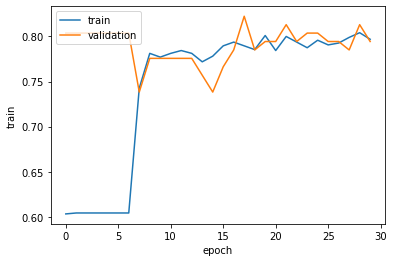

In [44]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

In [46]:
score = model.evaluate(test_features, test_label)

8/8 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7810


In [47]:
score[1]

0.7809917330741882

In [48]:
Jack = pd.Series([0,"Jack","male",23,1,0,5.0000,"S",3])
Rose = pd.Series([1,"Rose","female",20,1,0,100.0000,"S",1])

In [49]:
JR_df = pd.DataFrame([list(Jack),list(Rose)], columns = ["survived","name","sex","age","sibsp","parch","fare","embarked","pclass"])

In [50]:
JR_df

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass
0,0,Jack,male,23,1,0,5.0,S,3
1,1,Rose,female,20,1,0,100.0,S,1


In [51]:
all_df = pd.concat([all_df, JR_df])

In [52]:
all_df[10:]

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass
10,0,"Astor, Col. John Jacob",male,47.0,1,0,227.525,C,1
11,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,227.525,C,1
12,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.300,C,1
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,78.850,S,1
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,30.000,S,1
...,...,...,...,...,...,...,...,...,...
1306,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,7.225,C,3
1307,0,"Zakarian, Mr. Ortin",male,27.0,0,0,7.225,C,3
1308,0,"Zimmerman, Mr. Leo",male,29.0,0,0,7.875,S,3
0,0,Jack,male,23.0,1,0,5.000,S,3


In [53]:
all_features, label = PreprocessingData(all_df)

In [54]:
all_probability = model.predict(all_features)

In [55]:
all_probability[:10]

array([[0.9859394 ],
       [0.40587223],
       [0.9835765 ],
       [0.28196526],
       [0.98216593],
       [0.21216086],
       [0.96612823],
       [0.22954327],
       [0.96453667],
       [0.24387318]], dtype=float32)

In [56]:
all_probability[-2:]

array([[0.13930681],
       [0.98111606]], dtype=float32)

In [63]:
pd = all_df.insert(len(all_df.columns), "probability ", all_probability)

ValueError: cannot insert probability , already exists

In [65]:
all_df[-2:]

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass,probability:,probability
0,0,Jack,male,23.0,1,0,5.0,S,3,0.139307,0.139307
1,1,Rose,female,20.0,1,0,100.0,S,1,0.981116,0.981116


In [82]:
all_df.sort_values(by = 'probability ')

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass,probability:,probability
1235,0,"Svensson, Mr. Johan",male,74.0,0,0,7.7750,S,3,0.090036,0.090036
1068,0,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,6.2375,S,3,0.101870,0.101870
1225,0,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,3,0.103098,0.103098
736,0,"Coxon, Mr. Daniel",male,59.0,0,0,7.2500,S,3,0.103838,0.103838
727,0,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q,3,0.105405,0.105405
...,...,...,...,...,...,...,...,...,...,...,...
103,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,227.5250,C,1,0.986903,0.986903
35,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,262.3750,C,1,0.987600,0.987600
66,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,262.3750,C,1,0.987989,0.987989
50,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,512.3292,C,1,0.992672,0.992672


In [84]:
all_df[all_df['probability '] > 0.9]

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass,probability:,probability
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,1,0.985939,0.985939
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,1,0.983576,0.983576
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,1,0.982166,0.982166
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,77.9583,S,1,0.966128,0.966128
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,51.4792,S,1,0.964537,0.964537
...,...,...,...,...,...,...,...,...,...,...,...
588,1,"Wells, Miss. Joan",female,4.0000,1,1,23.0000,S,2,0.931266,0.931266
590,1,"West, Miss. Barbara J",female,0.9167,1,2,27.7500,S,2,0.935266,0.935266
591,1,"West, Miss. Constance Mirium",female,5.0000,1,2,27.7500,S,2,0.931019,0.931019
599,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0000,0,0,13.0000,S,2,0.900574,0.900574


In [86]:
all_df[(all_df['probability '] > 0.9) & (all_df["survived"] == 1)]

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass,probability:,probability
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,1,0.985939,0.985939
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,77.9583,S,1,0.966128,0.966128
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,51.4792,S,1,0.964537,0.964537
11,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,227.5250,C,1,0.986392,0.986392
12,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,69.3000,C,1,0.981499,0.981499
...,...,...,...,...,...,...,...,...,...,...,...
582,1,"Watt, Miss. Bertha J",female,12.0000,0,0,15.7500,S,2,0.928307,0.928307
588,1,"Wells, Miss. Joan",female,4.0000,1,1,23.0000,S,2,0.931266,0.931266
590,1,"West, Miss. Barbara J",female,0.9167,1,2,27.7500,S,2,0.935266,0.935266
591,1,"West, Miss. Constance Mirium",female,5.0000,1,2,27.7500,S,2,0.931019,0.931019


In [87]:
all_df[(all_df['probability '] > 0.9) & (all_df["survived"] == 0)]

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass,probability:,probability
2,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,1,0.983576,0.983576
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,1,0.982166,0.982166
105,0,"Evans, Miss. Edith Corse",female,36.0,0,0,31.6792,C,1,0.978879,0.978879
169,0,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,28.7125,C,1,0.976465,0.976465
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,221.7792,S,1,0.979329,0.979329
468,0,"Karnes, Mrs. J Frank (Claire Bennett)",female,22.0,0,0,21.0000,S,2,0.910509,0.910509
599,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,13.0000,S,2,0.900574,0.900574


In [90]:
all_df[(all_df['age'] > 18.0) & (all_df["survived"] == 1)]

,survived,name,sex,age,sibsp,parch,fare,embarked,pclass,probability:,probability
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,211.3375,S,1,0.985939,0.985939
5,1,"Anderson, Mr. Harry",male,48.0,0,0,26.5500,S,1,0.212161,0.212161
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,S,1,0.966128,0.966128
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,51.4792,S,1,0.964537,0.964537
12,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C,1,0.981499,0.981499
...,...,...,...,...,...,...,...,...,...,...,...
1261,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,9.5875,S,3,0.265315,0.265315
1277,1,"Vartanian, Mr. David",male,22.0,0,0,7.2250,C,3,0.202015,0.202015
1286,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,7.2292,C,3,0.481967,0.481967
1290,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3,0.292292,0.292292
